In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Se usan como metodos adicionales a los modelos para la reducccion de la dimensionalidad 
## PCA  

In [2]:
dt_heart = pd.read_csv('./data/heart.csv')
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dt_features  = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

In [7]:
dt_features = StandardScaler().fit_transform(dt_features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


In [11]:
#n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)          #n_components = No de columnas
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
ipca = IncrementalPCA(n_components=3, batch_size=10)      #batch_size = particiones 
ipca.fit(X_train)

IncrementalPCA(batch_size=10, copy=True, n_components=3, whiten=False)

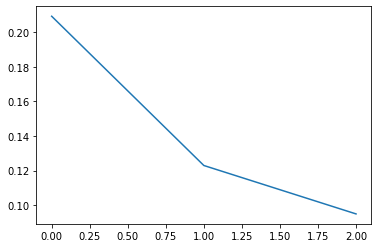

In [13]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_) 
plt.show()     #Aqui aparece la cantidad de info que me aporta cada una de las 3 variables que se crearon, 1ra - 25%, 2da -12%, 3ra- 5%

In [14]:
logistic = LogisticRegression(solver='lbfgs')

In [16]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857


In [17]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test))

#implementacion_algoritmo_pca

SCORE IPCA:  0.8051948051948052


## Kernel

In [23]:
from sklearn.decomposition import KernelPCA

In [18]:
dt_heart = pd.read_csv('./data/heart.csv')
dt_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
dt_features  = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

In [20]:
dt_features = StandardScaler().fit_transform(dt_features)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [24]:
kpca = KernelPCA(n_components=4, kernel='poly' )     #Kernel = linear, rbf
kpca.fit(X_train)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='poly',
          kernel_params=None, max_iter=None, n_components=4, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [ ]:
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

In [25]:
logistic = LogisticRegression(solver='lbfgs')

In [26]:
logistic.fit(dt_train, y_train)
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

#kernels_y_kpca

SCORE KPCA:  0.8051948051948052
